In [1]:
from policy_mining import PolicyMining
import pandas as pd
import networkx as nx
from auxiliar_functions.data_preprocessing import add_new_index
from auxiliar_functions.network_model import build_network_model, bipartite_projection, plot_distribution_degree
from auxiliar_functions.community_detection import sub_community_detection, add_type_commts
from auxiliar_functions.rule_inference import frequent_resources, get_attrs_from_user_sig, get_attrs_from_user, get_attrs_from_res, attribute_value_common, evaluate_weight
from auxiliar_functions.evaluation import get_FN_logs, get_FP_logs, get_FP_logs_ref, get_FN_logs_ref
from auxiliar_functions.refinement import generate_negative_rules
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.pyplot as plt

In [13]:
NAME_DATASET = "IoT"
FILE_NAME = "../00-Data/HC-AccessLog.csv"

In [18]:
df_data = pd.read_csv(FILE_NAME)
#df_data = df_data[df_data.columns[1:]]
df_data
df_pos = df_data[df_data.ACTION == "1"]
df_pos

,ACTION,role,type,oward,uward,team,treatingteam,patient,author,topic,specialty,agentfor,user
9000,1,none,hr,oncward,carward,oncteam1,oncteam1,oncpat2,oncdoc2,oncology,note,oncpat1,none
9001,1,none,hr,oncward,none,carteam1,carteam1,oncpat1,carnurse1,note,none,oncpat1,carnurse1
9002,1,doctor,hr,oncward,oncward,none,oncteam2,oncpat1,oncnurse2,nursing,cardiology,oncpat1,oncdoc2
9003,1,doctor,hr,none,none,oncteam1,carteam1,oncpat2,oncdoc2,note,cardiology,oncpat1,oncpat2
9004,1,none,hr,none,none,oncteam1,oncteam1,carpat2,oncnurse2,oncology,nursing,carpat1,carnurse1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,1,nurse,hritem,oncward,carward,carteam2,carteam2,carpat1,none,note,note,carpat1,carpat1
17996,1,doctor,hritem,none,none,carteam2,carteam2,carpat1,oncdoc1,note,nursing,none,carpat1
17997,1,nurse,hritem,oncward,oncward,carteam2,carteam2,carpat1,oncdoc2,note,oncology,carpat1,carpat1
17998,1,nurse,hritem,oncward,oncward,carteam2,carteam2,carpat1,oncdoc1,note,note,none,carpat1


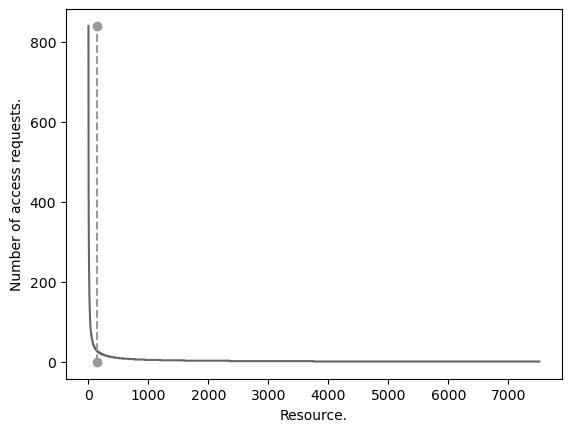

In [10]:
###### Tarea 4: recursos más frecuentes
res_to_freq = (df_data.RID.value_counts()).to_dict()
res_to_freq_lists = res_to_freq.items()
x_list, y_list = zip(*res_to_freq_lists)
#plt.figure(figsize=(20,15))
plt.plot(y_list, color='0.40', linestyle='-')
# plt.plot(141,8, marker="o", color="red")
plt.ylabel('Number of access requests.')
plt.xlabel('Resource.')
n_corte_recursos = 150
x1, y1 = [n_corte_recursos, n_corte_recursos] , [0, max(y_list)]
plt.plot(x1, y1, marker = 'o', linestyle='--', color="0.6")
#plt.text(n_corte_recursos+100, 5, '{}'.format(n_corte_recursos) , ha='left', va= 'top')
plt.savefig('frec-res-amz-corte.png')
plt.show()

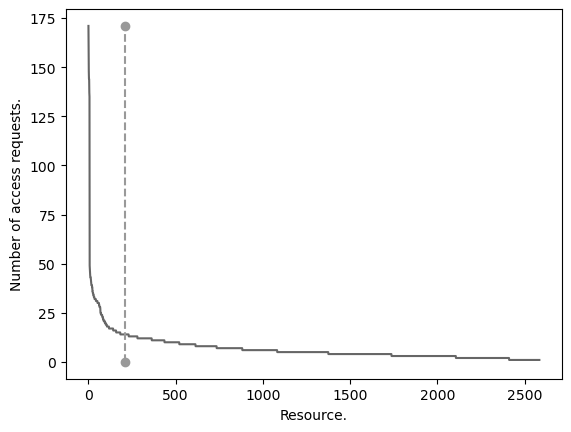

In [24]:
###### Tarea 4: recursos más frecuentes
res_to_freq = (df_data[["type", "author", "patient", "topic", "treatingteam"]].value_counts()).to_dict()
res_to_freq_lists = res_to_freq.items()
x_list, y_list = zip(*res_to_freq_lists)
#plt.figure(figsize=(20,15))
plt.plot(y_list, color='0.40', linestyle='-')
# plt.plot(141,8, marker="o", color="red")
plt.ylabel('Number of access requests.')
plt.xlabel('Resource.')
n_corte_recursos = 211
x1, y1 = [n_corte_recursos, n_corte_recursos] , [0, max(y_list)]
plt.plot(x1, y1, marker = 'o', linestyle='--', color="0.6")
#plt.text(n_corte_recursos+100, 5, '{}'.format(n_corte_recursos) , ha='left', va= 'top')
plt.savefig('frec-res-hc-corte.png')
plt.show()